In [1]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
stat_trans_act_graph_df = DataLoader.load_csv_stat_graph("-act-transitive")

Number of apps: 
412


Number of apps: 
412


Total covered methods:
4073936


Everything is good!


Total entries:
2087


Total entries:
41163


In [2]:

importlib.reload(CoverageHelper)

<module 'CoverageHelper' from 'C:\\Master\\Thesis\\IncubatorDataAnalyser\\CoverageHelper.py'>

Coverage_report

In [3]:
test_graph_df.head()

,source,target,action,widget_id,widget,strategy,app
0,com.lauapps.decorhome.MainActivity2,com.lauapps.decorhome.Donate,openMenu,NaN,NaN,systematic,com.lauapps.decorhome
1,com.lauapps.decorhome.MainActivity2,com.lauapps.decorhome.Donate,click,2.131427e+09,android.support.v7.widget.CardView,systematic,com.lauapps.decorhome
2,com.lauapps.decorhome.MainActivity2,com.lauapps.decorhome.Help,openMenu,NaN,NaN,systematic,com.lauapps.decorhome
3,com.lauapps.decorhome.MainActivity2,com.lauapps.decorhome.Help,click,-1.000000e+00,android.widget.MenuPopupWindow.MenuDropDownLis...,systematic,com.lauapps.decorhome
4,com.lauapps.decorhome.MainActivity2,com.lauapps.decorhome.PaintActivity1,click,2.131427e+09,android.support.v7.widget.CardView,random,com.lauapps.decorhome


In [4]:
systematic_block_coverage = CoverageHelper.calc_coverage(CoverageHelper.filter("block", "systematic", coverage_df))
systematic_block_coverage.describe()

count    412.000000
mean      19.080868
std       18.358747
min        0.000000
25%        5.491374
50%       13.604061
75%       27.942011
max      100.000000
Name: percentage_covered, dtype: float64

In [5]:
random_block_coverage = CoverageHelper.calc_coverage(CoverageHelper.filter("block", "random", coverage_df))
random_block_coverage.describe()

count    412.000000
mean      20.165190
std       18.533854
min        0.000000
25%        6.422691
50%       14.102564
75%       30.370813
max      100.000000
Name: percentage_covered, dtype: float64

In [6]:
diff_coverage = random_block_coverage - systematic_block_coverage
diff_coverage = diff_coverage.to_frame("diff_coverage")
# diff_coverage.sort_values(by="diff_coverage", ascending=False)

In [7]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.source != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.target != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.action != "back")]

valid_test_graph = test_graph_df

valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>appinventor.ai_agiapplications.CountYourSteps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [8]:
random_coverage_with_test_graph = valid_test_graph[(valid_test_graph.strategy == "random")].drop(
    'strategy', 1).groupby("app").count()
systematic_coverage_with_test_graph = valid_test_graph[
    (valid_test_graph.strategy == "systematic")].drop('strategy', 1).groupby("app").count()

,edges_random,edges_systematic
count,412.000000,412.000000
mean,2.500000,1.580097
std,3.780794,2.823415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,2.000000
max,26.000000,18.000000


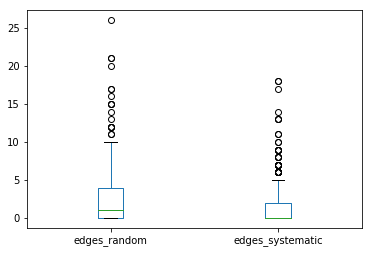

In [12]:
boxplot_df_edges = pd.DataFrame()
boxplot_df_edges["edges_random"] = random_coverage_with_test_graph.target
boxplot_df_edges["edges_systematic"] = systematic_coverage_with_test_graph.target
boxplot_df_edges.plot.box()
plt.savefig("./data/boxplot-edges.pdf", dpi=1200)
boxplot_df_edges.describe()

In [10]:
diff_in_graph_per_app = random_coverage_with_test_graph['target'] - systematic_coverage_with_test_graph['target']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame("edges").dropna()
diff_in_graph_per_app.describe().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &       edges \\\\\n\\midrule\ncount &  412.000000 \\\\\nmean  &    0.919903 \\\\\nstd   &    3.146217 \\\\\nmin   &  -13.000000 \\\\\n25\\%   &    0.000000 \\\\\n50\\%   &    0.000000 \\\\\n75\\%   &    2.000000 \\\\\nmax   &   18.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,edges,diff_coverage
count,412.000000,412.000000
mean,0.919903,1.084321
std,3.146217,5.663559
min,-13.000000,-42.345277
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,1.400680
max,18.000000,27.551296


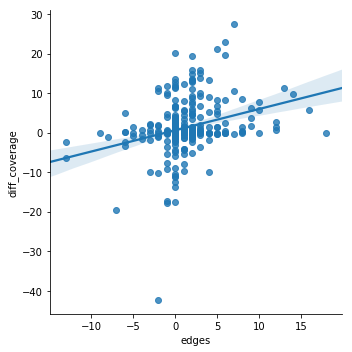

In [11]:
diff_result = pd.concat([diff_in_graph_per_app, diff_coverage], axis=1, sort=False).dropna()
sns.lmplot(x='edges', y='diff_coverage', data=diff_result, fit_reg=True)
plt.savefig("./data/scatterplot-diff-edges-diff-coverage.pdf", dpi=1200)
diff_result.describe()
# pearsonr(diff_result.edges, diff_result.diff_coverage)


In [15]:
number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,androidlab.carlog,source,androidlab.carlog.main.MainActivity
1,random,androidlab.carlog,source,androidlab.carlog.main.MainActivity
2,systematic,com.tpas.piercing.photo.studio,source,com.tpas.sticker.editor.Home
3,random,com.tpas.piercing.photo.studio,source,com.tpas.sticker.editor.Home
4,systematic,com.jham.happybirthday2,source,com.jham.happybirthday2.MainActivity


In [16]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)

'\\begin{tabular}{lrr}\n\\toprule\n{} &  screens\\_random &  screens\\_systematic \\\\\n\\midrule\ncount &      412.000000 &          412.000000 \\\\\nmean  &        2.228155 &            1.691748 \\\\\nstd   &        1.547743 &            0.919976 \\\\\nmin   &        1.000000 &            1.000000 \\\\\n25\\%   &        1.000000 &            1.000000 \\\\\n50\\%   &        2.000000 &            1.000000 \\\\\n75\\%   &        3.000000 &            2.000000 \\\\\nmax   &       10.000000 &            6.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

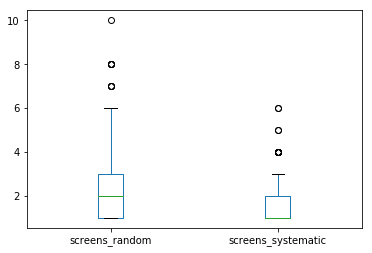

In [25]:
boxplot_df_screens = pd.DataFrame()
boxplot_df_screens["screens_random"] = ran_n.groupby(['app']).value.nunique()
boxplot_df_screens["screens_systematic"] = sys_n.groupby(['app']).value.nunique()
boxplot_df_screens.plot.box()
plt.savefig("./data/boxplot-screens.pdf", dpi=1200)
boxplot_df_screens.describe().to_latex()

In [27]:
diff_in_unique_screens = (ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()).dropna()
diff_in_unique_screens.describe().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &       value \\\\\n\\midrule\ncount &  412.000000 \\\\\nmean  &    0.536408 \\\\\nstd   &    1.131773 \\\\\nmin   &   -2.000000 \\\\\n25\\%   &    0.000000 \\\\\n50\\%   &    0.000000 \\\\\n75\\%   &    1.000000 \\\\\nmax   &    8.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.37411386282016784, 3.910455850731806e-15)

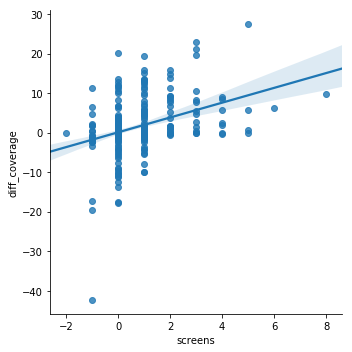

In [19]:
diff_result = pd.concat([diff_in_unique_screens.to_frame("screens"), diff_coverage], axis=1, sort=False).dropna()
# sns.lmplot(x='screens', y='diff_coverage', data=diff_result, fit_reg=True, x_estimator=np.mean)
# sns.lmplot(x='screens', y='diff_coverage', data=diff_result, x_jitter=0.05)
sns.lmplot(x='screens', y='diff_coverage', data=diff_result)
plt.savefig("./data/scatterplot-diff-screens-diff-coverage.pdf", dpi=1200)
diff_result.describe()
pearsonr(diff_result.screens, diff_result.diff_coverage)


In [62]:
# # total_screens_stat =
# number_of_unique_screens_per_app_stat = stat_trans_act_graph_df[['app', 'source', 'target']].melt(
#     id_vars=['app'])
# 
# number_of_unique_screens_per_app_stat.head()
# 
# stat_trans_act_graph_df.app.nunique()


In [63]:
# number_of_unique_screens_per_app_stat.groupby("app").value.count().head()

In [64]:
# random_unique_screens_found_percentage = pd.DataFrame()
# random_unique_screens_found_percentage['screens_found'] = ran_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
# # random_unique_screens_found_percentage[]
# random_unique_screens_found_percentage.count()
# # random_unique_screens_found_percentage.sort_values(by="diff_screens", ascending=False).head()

In [65]:
# systematic_unique_screens_found_percentage = sys_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
# systematic_unique_screens_found_percentage = systematic_unique_screens_found_percentage.to_frame("screens_found")
# systematic_unique_screens_found_percentage.head()

In [66]:
# diff_screen_found_percentage = (random_unique_screens_found_percentage - systematic_unique_screens_found_percentage).dropna()
# diff_screen_found_percentage.head()

In [67]:
# random_edges_percentage = pd.DataFrame()
# random_edges_percentage['edges_found'] = random_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
# random_edges_percentage.head()

In [68]:
# systematic_edges_percentage = pd.DataFrame()
# systematic_edges_percentage['edges_found'] = systematic_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
# systematic_edges_percentage.head()

In [69]:
# diff_edges_found_percentage = (random_edges_percentage - systematic_edges_percentage).dropna()
# diff_edges_found_percentage.head()

In [70]:
# diff_result = pd.concat([diff_edges_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
# diff_result.plot.scatter(x="edges_found", y="coverage")
# diff_result.head()


In [61]:
# diff_result = pd.concat([diff_screen_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
# diff_result.plot.scatter(x="screens_found", y="coverage")
# diff_result.head()

